In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols


import warnings
warnings.filterwarnings('ignore')

# 1. Import Cleaned Data

In [50]:
data = pd.read_csv('added_features_data.csv',index_col=0)
dummy_data = pd.read_csv('dummy_data.csv',index_col=0)
final_data = pd.concat([data,dummy_data],axis=1)

In [51]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold
0,538000.0,3,2.25,2570,7242,2.0,2170,47.7210,-122.319,1690,7639,9812,2570.0,63
1,571000.0,4,2.00,2750,7807,1.5,2250,47.7168,-122.287,1510,7807,10557,2750.0,98
2,315000.0,3,1.00,960,6634,1.0,960,47.7264,-122.310,1570,7203,7594,960.0,62
3,382500.0,2,1.00,1190,4440,1.0,1190,47.7135,-122.287,1060,5715,5630,1190.0,33
4,425000.0,3,1.75,2500,6840,1.0,1300,47.7222,-122.320,1580,8691,9340,2500.0,57


In [52]:
dummy_data.head()

,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [53]:
pd.set_option('display.max_columns', 100)
final_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,538000.0,3,2.25,2570,7242,2.0,2170,47.7210,-122.319,1690,7639,9812,2570.0,63,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,571000.0,4,2.00,2750,7807,1.5,2250,47.7168,-122.287,1510,7807,10557,2750.0,98,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,315000.0,3,1.00,960,6634,1.0,960,47.7264,-122.310,1570,7203,7594,960.0,62,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,382500.0,2,1.00,1190,4440,1.0,1190,47.7135,-122.287,1060,5715,5630,1190.0,33,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,425000.0,3,1.75,2500,6840,1.0,1300,47.7222,-122.320,1580,8691,9340,2500.0,57,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [54]:
# continuous = ['sqft_living','sqft_lot','sqft_above','lat','long','sqft_living15','sqft_lot15',
#              'total_sqft','total_sqft_inside','age_when_sold']
# discrete = ['bedrooms','bathroom','floors']

# 2. Baseline Model

https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa

* Starting with a simple model as a baseline consistently led to a better end product.
* Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementations are widely available in popular packages.

In our case, we created a baseline model that was simple to set up in which we data cleaned and created dummy variables for our categorical variables.

In [55]:
# outcome is target
outcome = 'price'
# x_cols are the predictors
x_cols = list(final_data.drop(['price'],axis=1).columns)

In [56]:
# testing regression model with current train data
pred_sum = '+'.join(x_cols)
formula = outcome + '~' + pred_sum

model_1_results = ols(formula=formula, data=final_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     959.4
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:30:57   Log-Likelihood:            -2.5817e+05
No. Observations:               19087   AIC:                         5.165e+05
Df Residuals:                   19022   BIC:                         5.170e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -8.558e+07   3.95e+06    -21.649      0.000   -9.33e+07   -7.78e+07
bedrooms          -3.212e+04   1969.334    -16.312      0.000    -3.6e+04   -2.83e+04
bathrooms          4.413e+04   3237.500     13.630      0.000    3.78e+04    5.05e+04
sqft_living          91.3615     11.389      8.022      0.000      69.037     113.686
sqft_lot            -45.5719      5.695     -8.002      0.000     -56.734     -34.410
floors             1205.7636   3961.390      0.304      0.761   -6558.912    8970.439
sqft_above           49.1269      6.574      7.473      0.000      36.241      62.012
lat                6.596e+05   2.08e+04     31.778      0.000    6.19e+05       7e+05
long              -4.428e+05    3.2e+04    -13.825      0.000   -5.06e+05    -3.8e+05
sqft_living15        30.6352      3.374      9.080      0.000      24.022      37.248
sqft_lot15           -0.2170      0.072     -3.017      0.003      -0.358      -0.076
total_sqft           45.7895      5.695      8.041      0.000      34.627      56.952
total_sqft_inside     6.1034     17.716      0.345      0.730     -28.621      40.828
age_when_sold      1456.6085    470.836      3.094      0.002     533.728    2379.489
waterfront_1       5.814e+05   1.92e+04     30.341      0.000    5.44e+05    6.19e+05
view_1             8.553e+04    1.1e+04      7.806      0.000    6.41e+04    1.07e+05
view_2             6.705e+04   6691.248     10.021      0.000    5.39e+04    8.02e+04
view_3             1.365e+05   9299.688     14.677      0.000    1.18e+05    1.55e+05
view_4             2.418e+05   1.39e+04     17.383      0.000    2.14e+05    2.69e+05
condition_2        5.861e+04   4.02e+04      1.460      0.144   -2.01e+04    1.37e+05
condition_3        7.217e+04   3.74e+04      1.929      0.054   -1149.914    1.45e+05
condition_4        9.758e+04   3.74e+04      2.607      0.009    2.42e+04    1.71e+05
condition_5        1.413e+05   3.76e+04      3.754      0.000    6.75e+04    2.15e+05
quarter_sold_2     2.335e+04   4690.438      4.978      0.000    1.42e+04    3.25e+04
quarter_sold_3     1.934e+04   6153.171      3.143      0.002    7278.144    3.14e+04
quarter_sold_4     2.208e+04   6277.680      3.517      0.000    9770.976    3.44e+04
year_sold_2015     3.989e+04   4763.374      8.375      0.000    3.06e+04    4.92e+04
decade_built_1910 -1.526e+04   1.11e+04     -1.373      0.170    -3.7e+04    6524.664
decade_built_1920 -2672.3973   1.33e+04     -0.202      0.840   -2.87e+04    2.33e+04
decade_built_1930 -1.577e+04    1.8e+04     -0.878      0.380    -5.1e+04    1.94e+04
decade_built_1940 -5.316e+04   2.08e+04     -2.558      0.011   -9.39e+04   -1.24e+04
decade_built_1950 -6.724e+04   2.49e+04     -2.696      0.007   -1.16e+05   -1.84e+04
decade_built_1960 -6.796e+04   2.94e+04     -2.308      0.021   -1.26e+05

## Interpretation

* R-squared is ~0.763, showing that our data is closely fitted to our regression line
* F-statistic p-value is 0.00, probability that our sample would represent the population, holds true
* There are a lot of p-values > 0.05 for our coefficients, indicating there is no statistically significant relationship between the coefficient and predictor.
* Skewness is not 0 (normal) and is higher than 1, meaning the data is highly skewed
* Kurtosis is not 3 (normal) and is higher than 3, meaning the tails are heavy

# 2. Linearity between Features and Price

The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

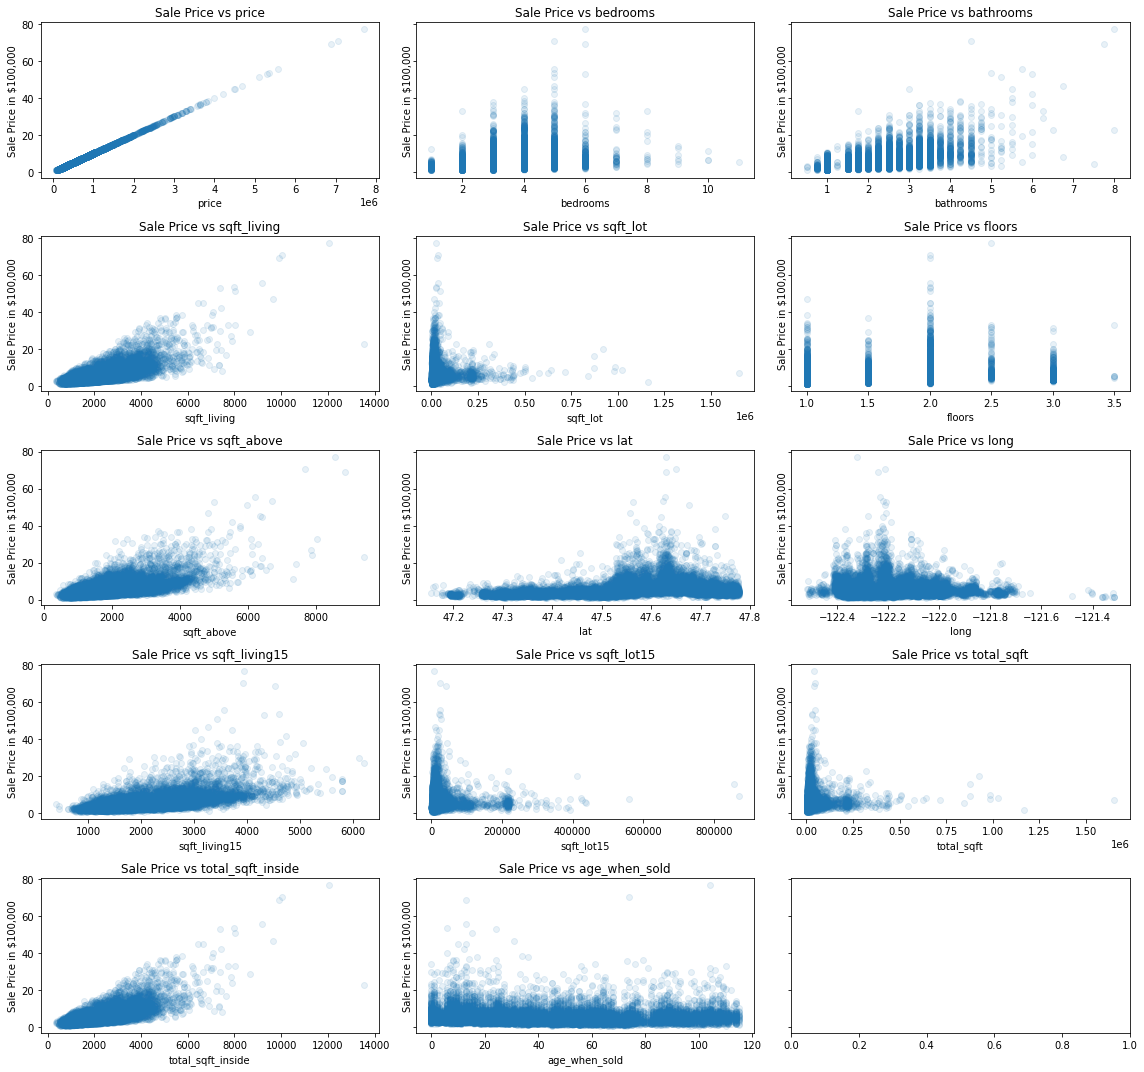

In [57]:
# plotting linearity between feature and price
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

In [58]:
# checking correlation between each feature and price
data.corr()['price'].sort_values(ascending=False)

price                1.000000
sqft_living          0.704079
total_sqft_inside    0.702235
sqft_above           0.608251
sqft_living15        0.580673
bathrooms            0.526786
bedrooms             0.318083
lat                  0.304657
floors               0.256381
total_sqft           0.101436
sqft_lot             0.085975
sqft_lot15           0.080577
long                 0.019184
age_when_sold       -0.050806
Name: price, dtype: float64

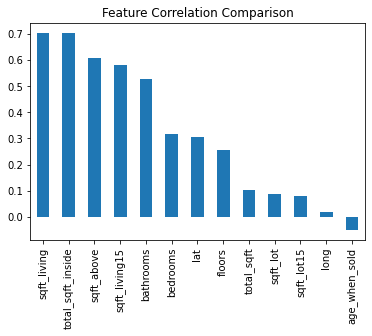

In [59]:
# plotting correlation between each feature and price
data.corr()['price'].drop(['price']).sort_values(ascending=False).plot(kind='bar').set_title(
    'Feature Correlation Comparison');

I decided if any of the features have a correlation of under 0.10, there is clearly no relationship. The following features have no relation with the target variable price: 'sqft_lot','long','sqft_lot15','age_when_sold'. I will drop them from the model.

In [60]:
# drop features from data
data = data.drop(['sqft_lot','long','sqft_lot15','age_when_sold'],axis=1)

In [61]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,lat,sqft_living15,total_sqft,total_sqft_inside
0,538000.0,3,2.25,2570,2.0,2170,47.7210,1690,9812,2570.0
1,571000.0,4,2.00,2750,1.5,2250,47.7168,1510,10557,2750.0
2,315000.0,3,1.00,960,1.0,960,47.7264,1570,7594,960.0
3,382500.0,2,1.00,1190,1.0,1190,47.7135,1060,5630,1190.0
4,425000.0,3,1.75,2500,1.0,1300,47.7222,1580,9340,2500.0


# 3. Normalizing/Transform Features

* having the data more normally distributed will benefit the model and model performance in general
* while normality of the predictors is not a mandatory assumption, having approximately normal features may be helpful

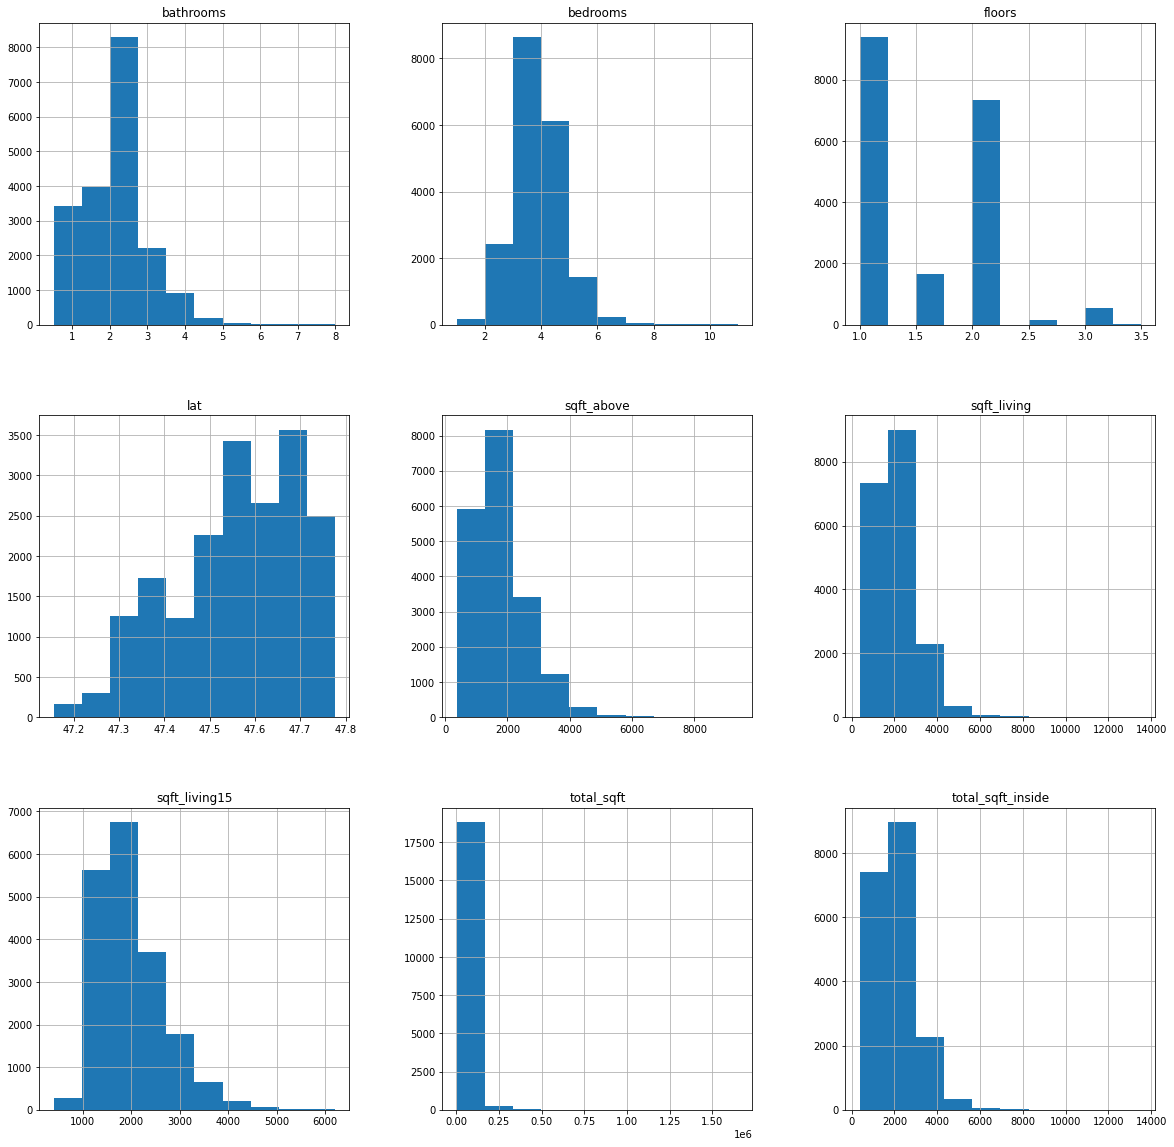

In [62]:
# plotting each continuous feature
data.drop(['price'],axis=1).hist(figsize=(20,20));

Looks like all of the features are not normal in which it needs to be improved on. I applied the logarithmic function and normalized each non-normal feature.
* Log transforms results in having more normal data distributions
* Because features vary largely in magnitudes, the coefficient sizes will fluctuate largely in magnitude as well. This can give the false impression that some variables are less important than others. Scaling the features allows them to have similar magnitudes.

In [63]:
# log transform each feature and concatenate them into df_log
df_log = pd.DataFrame([])

for i in data.drop(['price'],axis=1):
    df_log['log_' + i] = np.log(data[i])  
        
# normalizes each feature
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

model_1_data = pd.concat([df_log.apply(normalize),data['price']],axis=1)
model_1_data.head()

,log_bedrooms,log_bathrooms,log_sqft_living,log_floors,log_sqft_above,log_lat,log_sqft_living15,log_total_sqft,log_total_sqft_inside,price
0,-0.282744,0.335531,0.703982,1.001000,0.665400,1.159046,-0.331336,-0.082756,0.710520,538000.0
1,0.736064,0.035075,0.863320,0.185242,0.749874,1.128895,-0.675720,0.011658,0.869554,571000.0
2,-0.282744,-1.733093,-1.613848,-0.964503,-1.237548,1.197809,-0.556564,-0.413343,-1.602866,315000.0
3,-1.718674,-1.733093,-1.108315,-0.964503,-0.736406,1.105202,-1.757752,-0.799407,-1.098302,382500.0
4,-0.282744,-0.305554,0.638982,-0.964503,-0.530114,1.167661,-0.537148,-0.146358,0.645645,425000.0


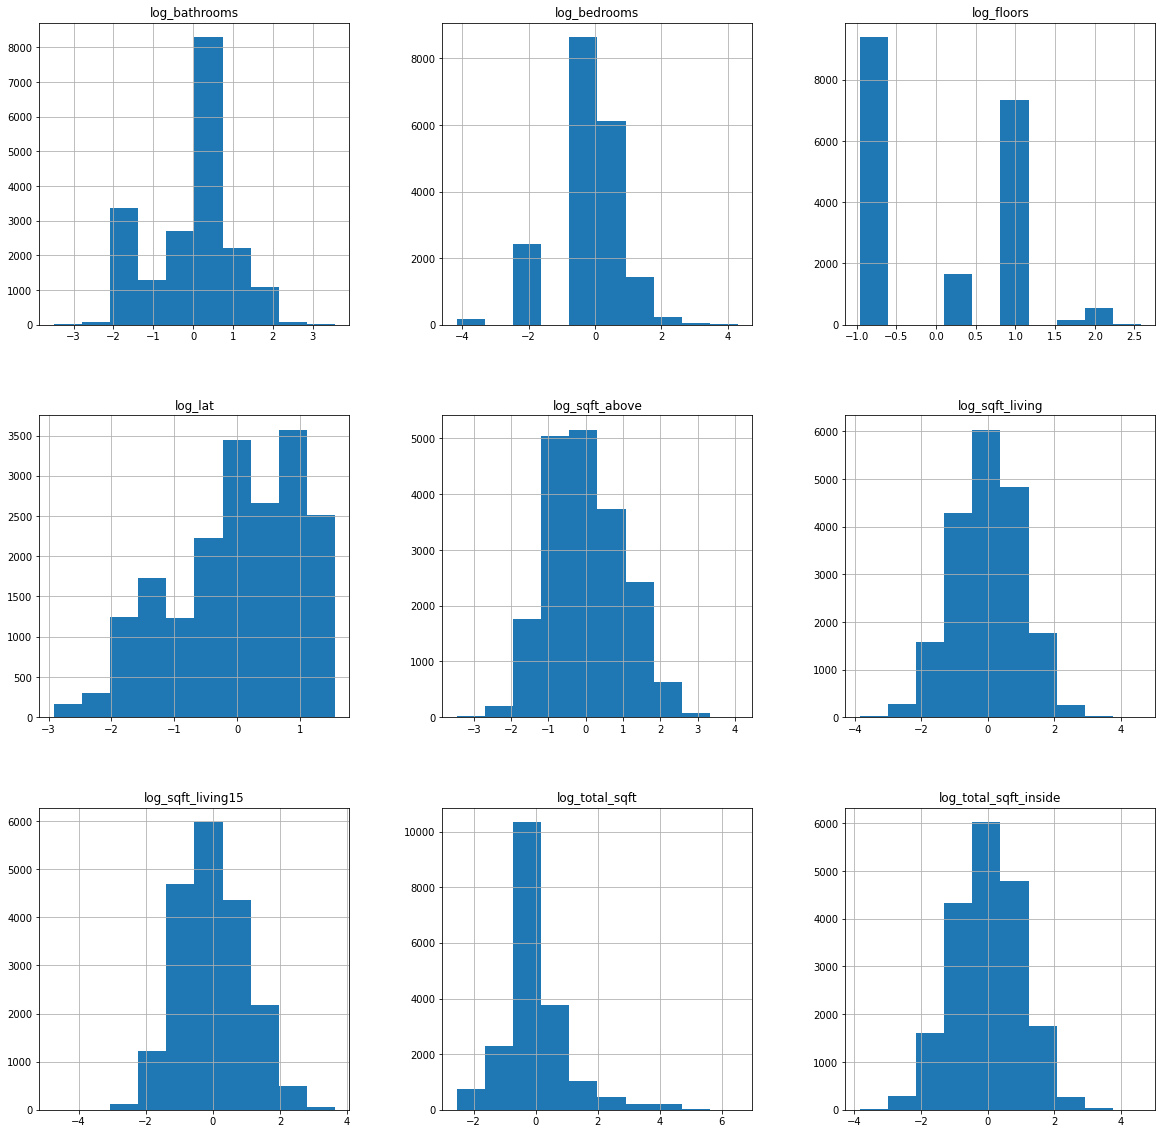

In [64]:
# plotting each continuous feature once log transformed and normalized
model_1_data.drop(['price'],axis=1).hist(figsize=(20,20));

In [65]:
model_1_data.head()

,log_bedrooms,log_bathrooms,log_sqft_living,log_floors,log_sqft_above,log_lat,log_sqft_living15,log_total_sqft,log_total_sqft_inside,price
0,-0.282744,0.335531,0.703982,1.001000,0.665400,1.159046,-0.331336,-0.082756,0.710520,538000.0
1,0.736064,0.035075,0.863320,0.185242,0.749874,1.128895,-0.675720,0.011658,0.869554,571000.0
2,-0.282744,-1.733093,-1.613848,-0.964503,-1.237548,1.197809,-0.556564,-0.413343,-1.602866,315000.0
3,-1.718674,-1.733093,-1.108315,-0.964503,-0.736406,1.105202,-1.757752,-0.799407,-1.098302,382500.0
4,-0.282744,-0.305554,0.638982,-0.964503,-0.530114,1.167661,-0.537148,-0.146358,0.645645,425000.0


# Simple Regression for each Predictor Variable (Preprocessed)

* The **Y and Fitted vs. X graph** plots the dependent variable against our predicted values with a confidence interval. The positive relationship shows that height and weight are correlated, i.e., when one variable increases the other increases.

* The **Residuals versus height graph** shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

* The **Partial regression plot** shows the relationship between height and weight, taking in to account the impact of adding other independent variables on our existing height coefficient. You'll later learn how this same graph changes when you add more variables.

* The **Component and Component Plus Residual (CCPR) plot** is an extension of the partial regression plot. It shows where the trend line would lie after adding the impact of adding our other independent variables on the weight.

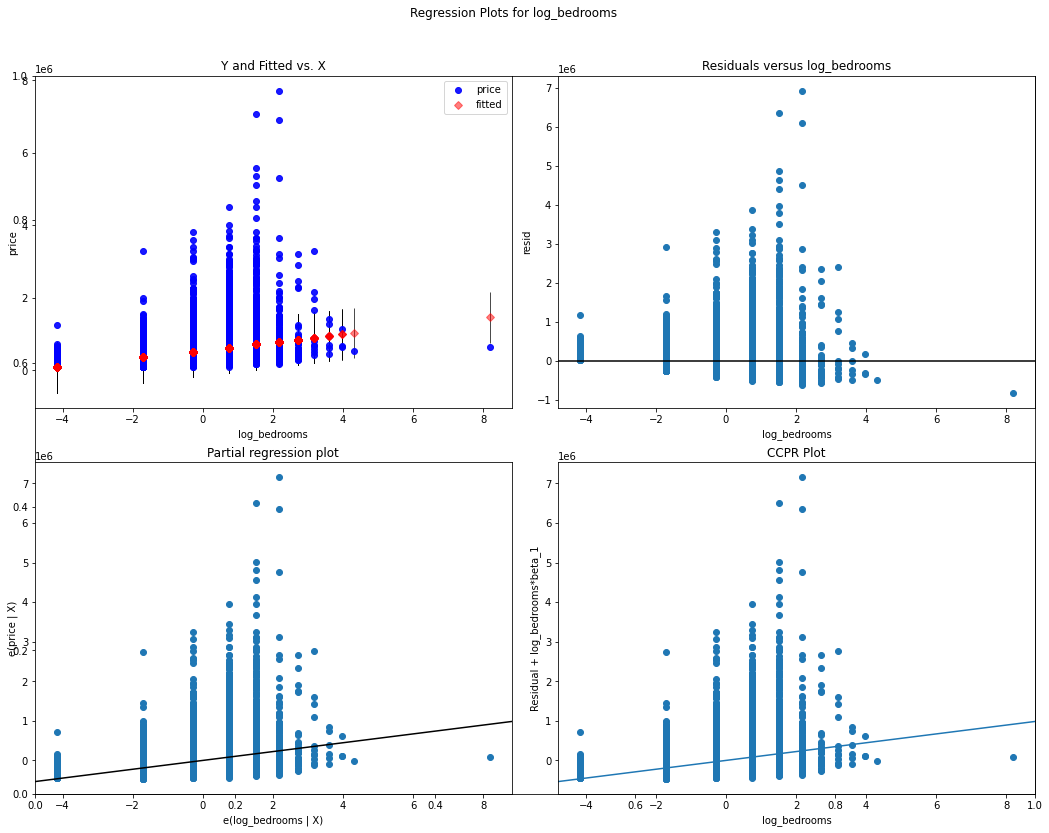

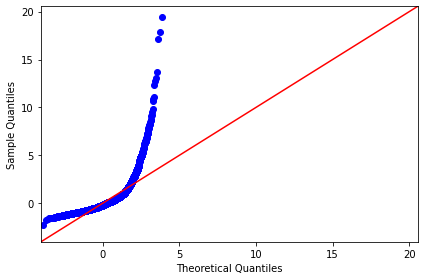

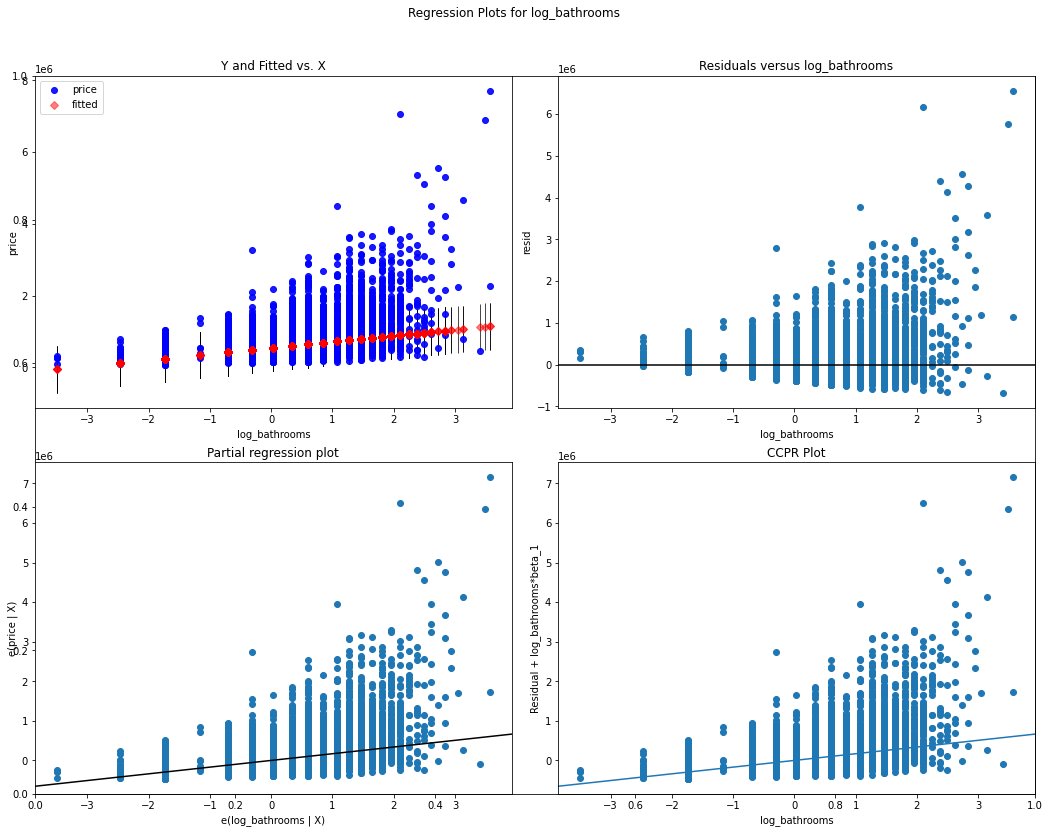

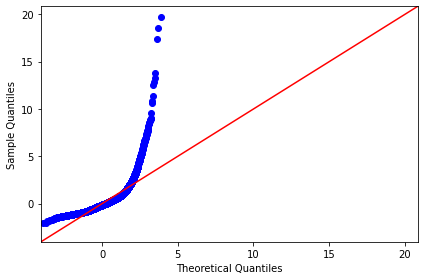

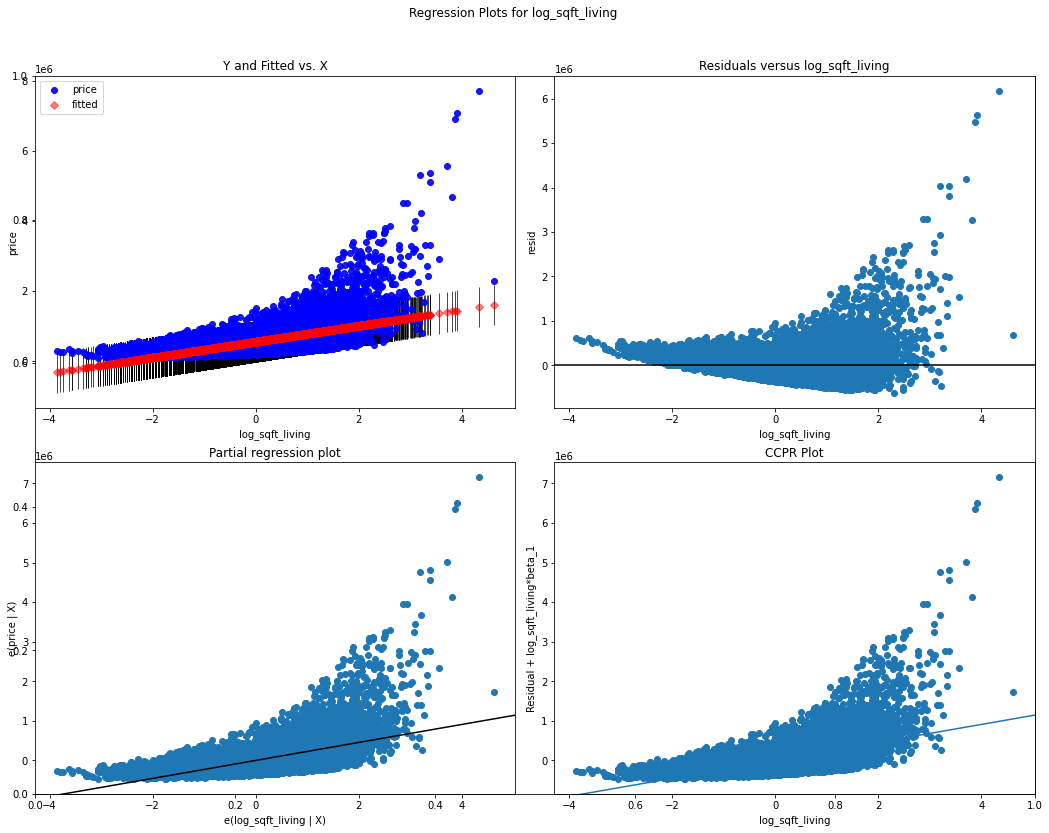

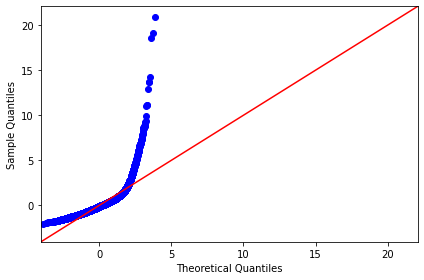

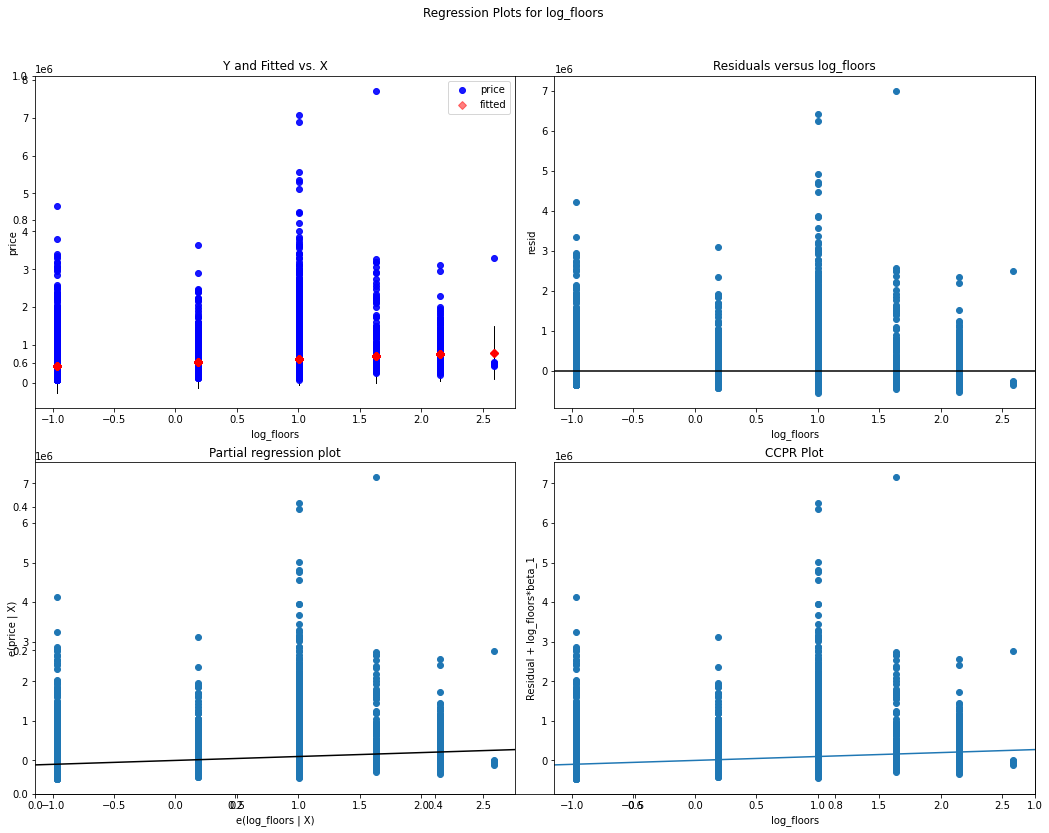

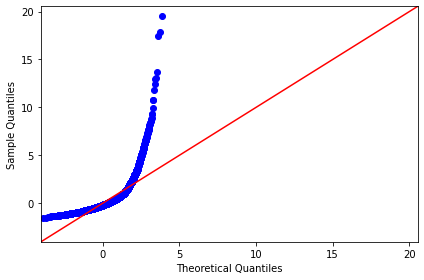

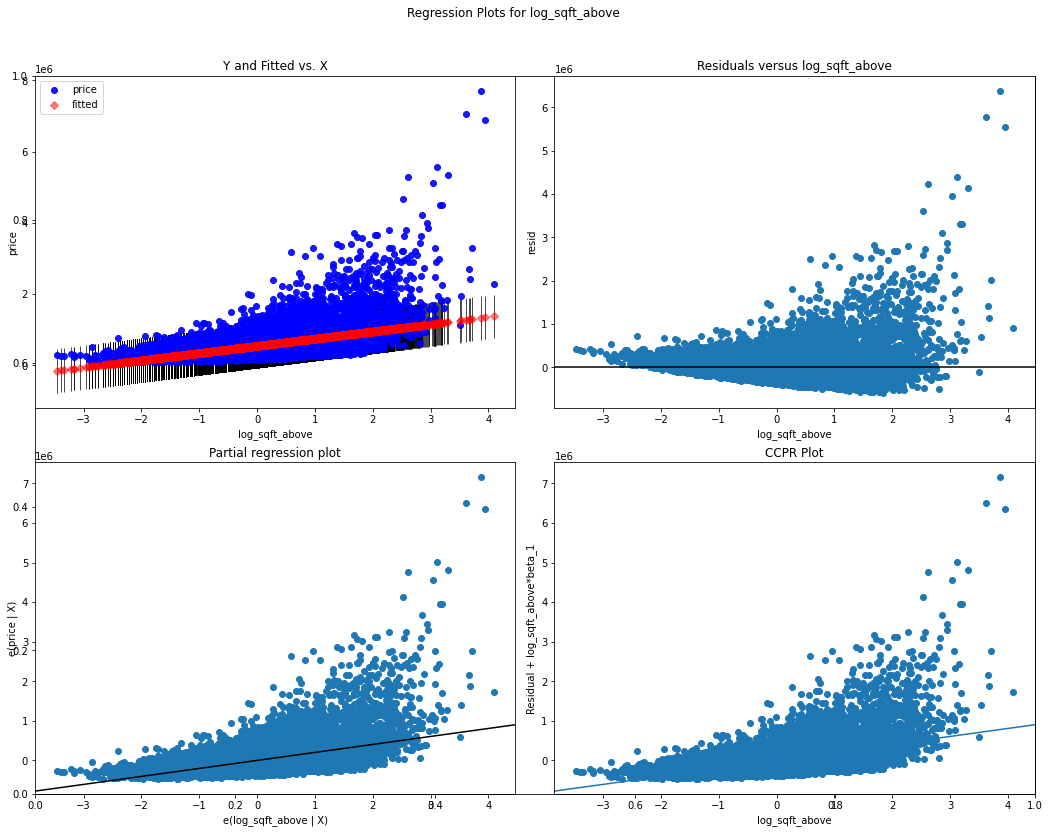

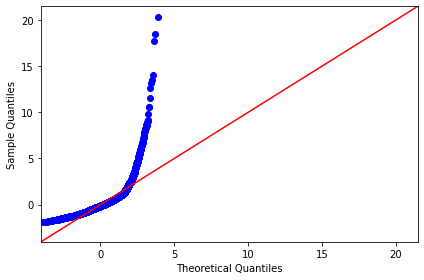

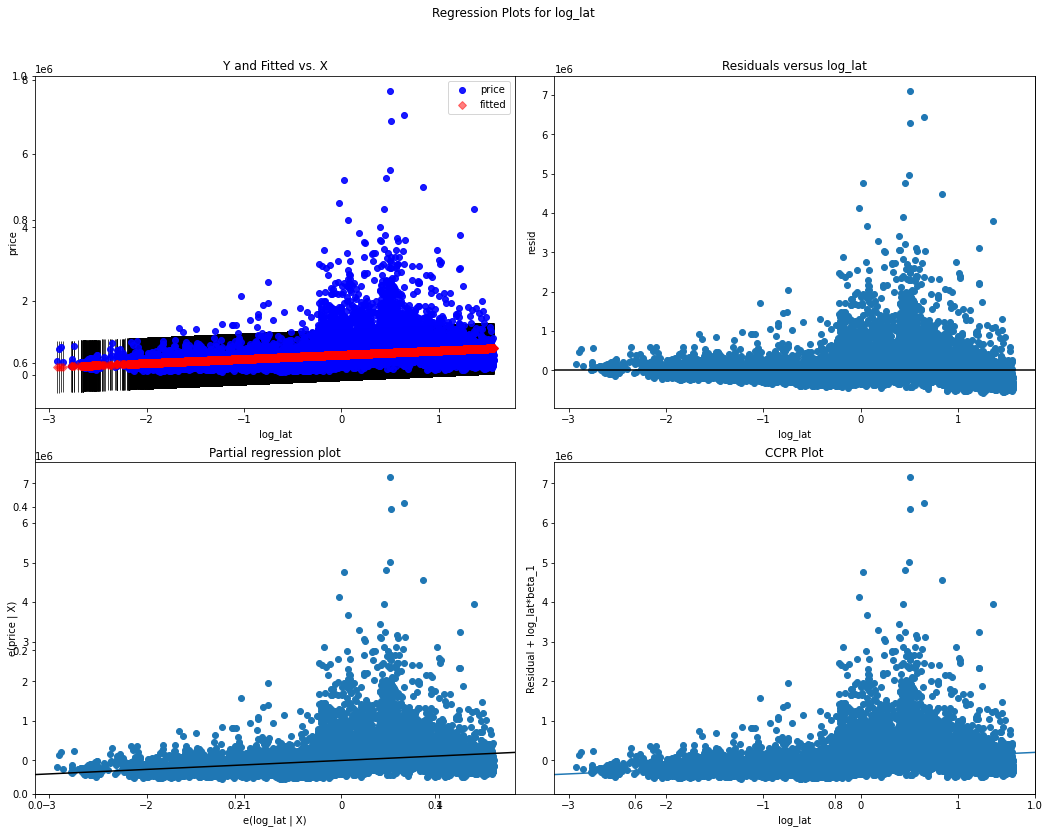

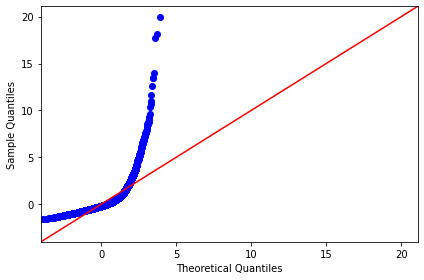

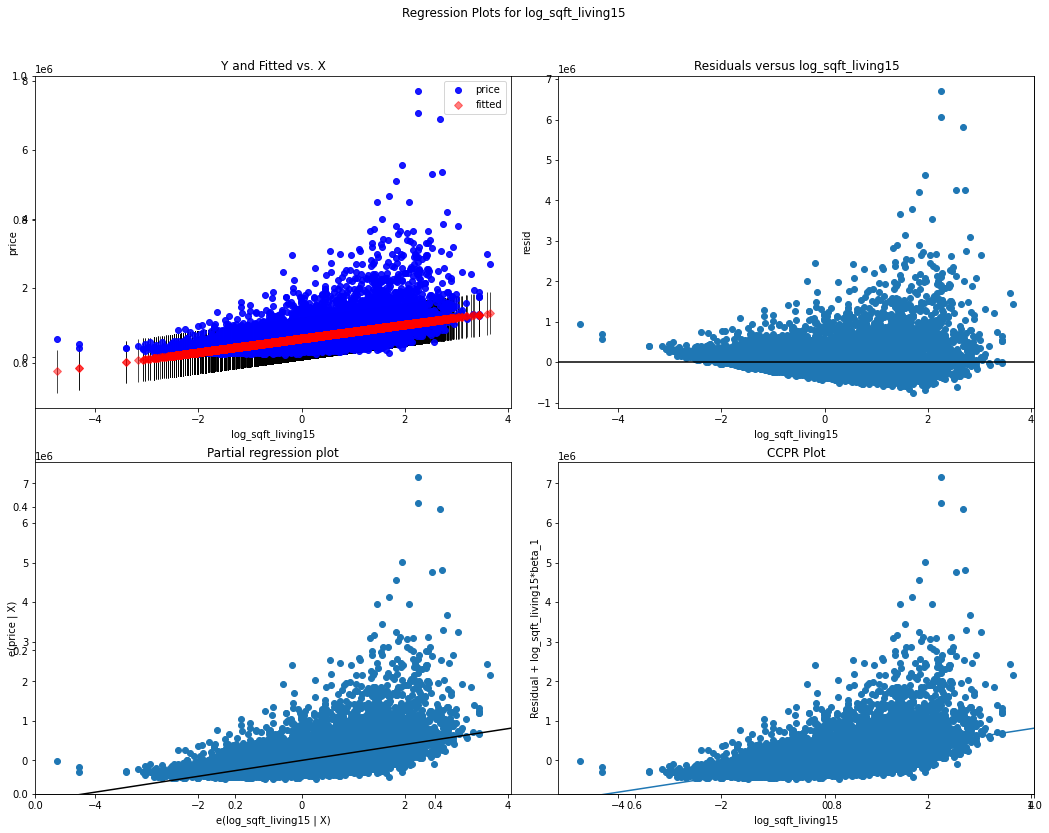

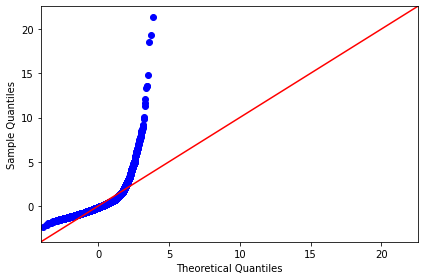

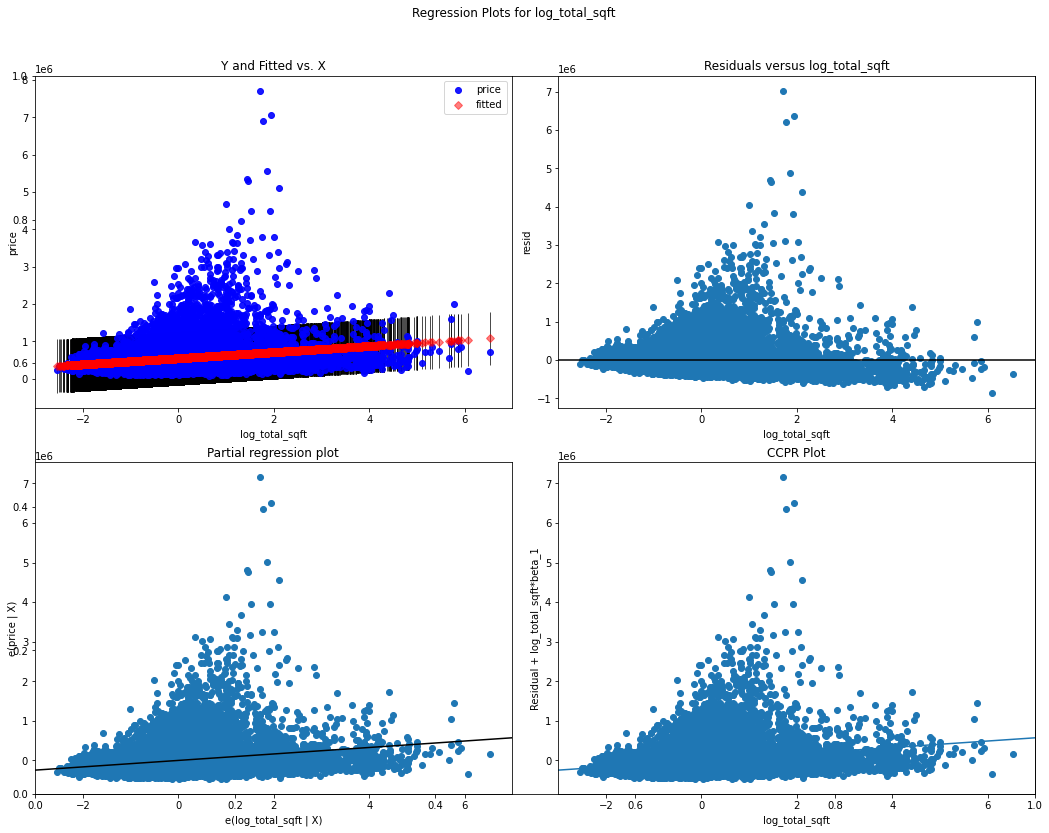

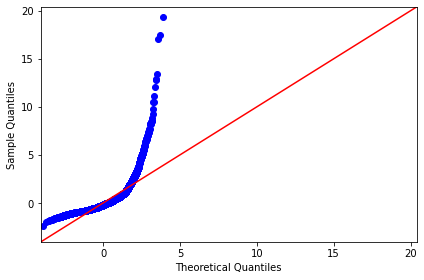

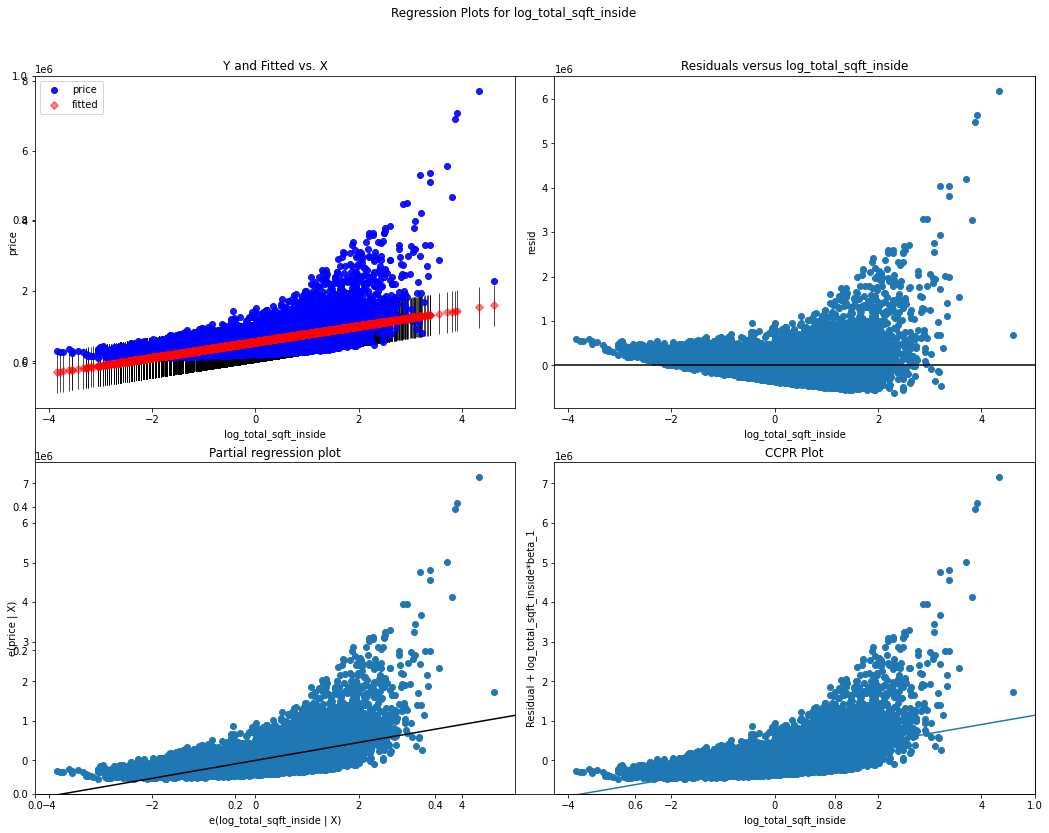

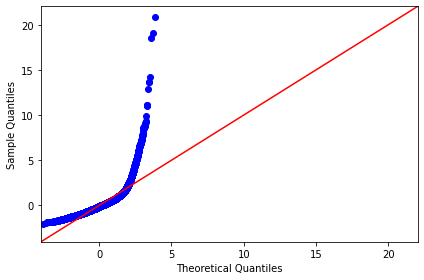

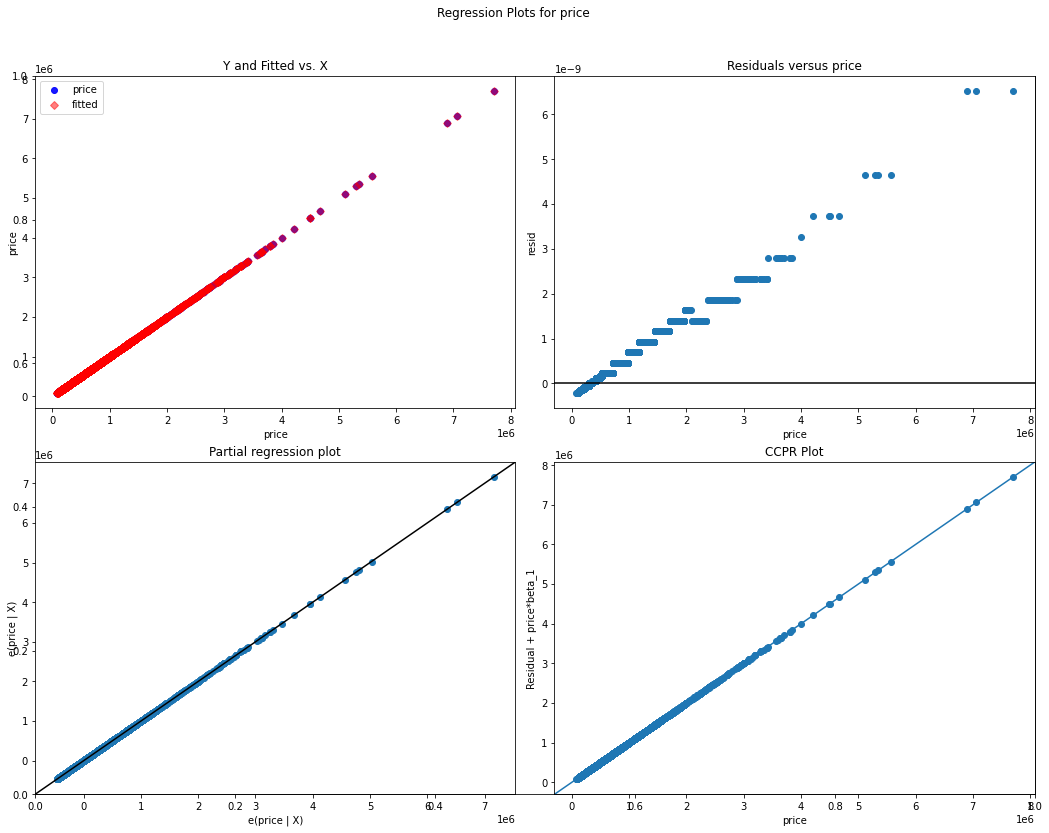

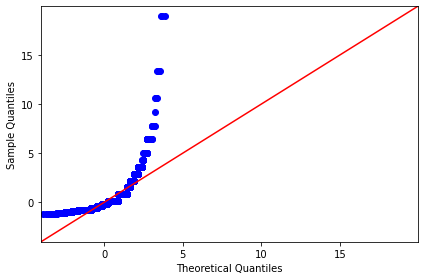

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


results = []
for idx, column in enumerate(model_1_data.columns):

    f = f'price~{column}'
    model = smf.ols(formula=f, data=model_1_data).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], 
                    sms.jarque_bera(model.resid)[0]])

In [20]:
# # removing outliers by filtering between 200,000 and 1,000,000
# orig_tot = len(model_1_data)
# # Subsetting to remove extreme outliers
# model_1_data = model_1_data[(model_1_data['price'] < 1000000) & (model_1_data['price'] > 200000)]
# print('Percent removed:', (orig_tot - len(model_1_data))/orig_tot)
# # Applying a log transformation
model_1_data['log_price'] = model_1_data['price'].map(np.log)
model_1_data = model_1_data.drop(['price'],axis=1)

In [21]:
model_1_data.head()

,log_bedrooms,log_bathrooms,log_sqft_living,log_floors,log_sqft_above,log_lat,log_sqft_living15,log_total_sqft,log_total_sqft_inside,log_price
0,-0.282691,0.335531,0.703982,1.001000,0.665400,1.159046,-0.331336,-0.082756,0.710520,13.195614
1,0.734326,0.035075,0.863320,0.185242,0.749874,1.128895,-0.675720,0.011658,0.869554,13.255144
2,-0.282691,-1.733093,-1.613848,-0.964503,-1.237548,1.197809,-0.556564,-0.413343,-1.602866,12.660328
3,-1.716096,-1.733093,-1.108315,-0.964503,-0.736406,1.105202,-1.757752,-0.799407,-1.098302,12.854484
4,-0.282691,-0.305554,0.638982,-0.964503,-0.530114,1.167661,-0.537148,-0.146358,0.645645,12.959844


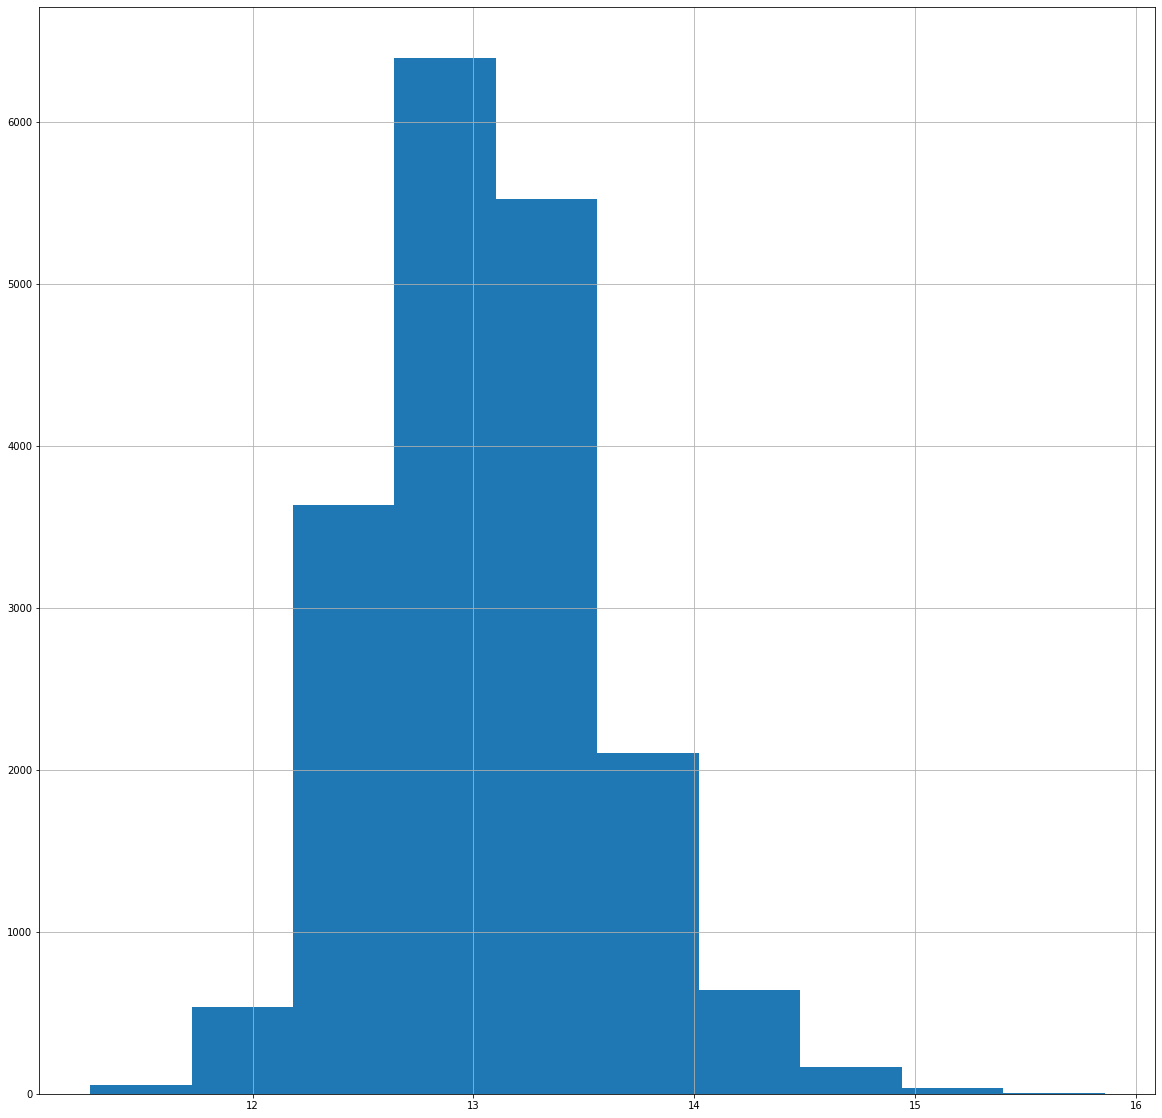

In [23]:
model_1_data['log_price'].hist(figsize=(20,20));

# 6. Train Test Split

We want to predict the outcome for observations that are not necessarily in our dataset now. The reason for building the model is because we want to predict the outocome for observations that are not in our dataset now.

Train Test Split splits our data randomly to both train the model and test the model.

In [24]:
# concat the log/normalized continuous data with the dummy data
model_1_data = pd.concat([model_1_data,dummy_data],axis=1).dropna()
model_1_data.head()

,log_bedrooms,log_bathrooms,log_sqft_living,log_floors,log_sqft_above,log_lat,log_sqft_living15,log_total_sqft,log_total_sqft_inside,log_price,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,-0.282691,0.335531,0.703982,1.001000,0.665400,1.159046,-0.331336,-0.082756,0.710520,13.195614,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.734326,0.035075,0.863320,0.185242,0.749874,1.128895,-0.675720,0.011658,0.869554,13.255144,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.282691,-1.733093,-1.613848,-0.964503,-1.237548,1.197809,-0.556564,-0.413343,-1.602866,12.660328,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-1.716096,-1.733093,-1.108315,-0.964503,-0.736406,1.105202,-1.757752,-0.799407,-1.098302,12.854484,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.282691,-0.305554,0.638982,-0.964503,-0.530114,1.167661,-0.537148,-0.146358,0.645645,12.959844,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [25]:
model_1_data.shape

(19087, 62)

In [26]:
# splits the data into training data and testing data
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(model_1_data)

x_train_data = train_data.drop(['log_price'],axis=1)
y_train_data = train_data['log_price']

x_test_data = test_data.drop(['log_price'],axis=1)
y_test_data = test_data['log_price']

print('Training Data')
print('-------------')
print(f'x_train: {len(x_train_data)}')
print(f'y_train: {len(y_train_data)}')
print('\n')
print('Testing Data')
print('-------------')
print(f'x_test: {len(x_test_data)}')
print(f'y_test: {len(y_test_data)}')

Training Data
-------------
x_train: 14315
y_train: 14315


Testing Data
-------------
x_test: 4772
y_test: 4772


# 7. Training the Model

In [27]:
# outcome is target
outcome = 'log_price'
# x_cols are the predictors
x_cols = list(train_data.drop(['log_price'],axis=1).columns)

# testing regression model with current train data
pred_sum = '+'.join(x_cols)
formula = outcome + '~' + pred_sum

model_1_results = ols(formula=formula, data=train_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1035.
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:40:38   Log-Likelihood:                 965.31
No. Observations:               14315   AIC:                            -1807.
Df Residuals:                   14253   BIC:                            -1337.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.7126      0.055    229.739      0.000      12.604      12.821
log_bedrooms             -0.0271      0.003    -10.135      0.000      -0.032      -0.022
log_bathrooms             0.0410      0.004     11.460      0.000       0.034       0.048
log_sqft_living           0.1877      0.021      9.152      0.000       0.147       0.228
log_floors                0.0082      0.003      2.499      0.012       0.002       0.015
log_sqft_above            0.1215      0.009     14.259      0.000       0.105       0.138
log_lat                   0.2132      0.004     51.430      0.000       0.205       0.221
log_sqft_living15         0.0707      0.003     21.794      0.000       0.064       0.077
log_total_sqft            0.0244      0.003      8.551      0.000       0.019       0.030
log_total_sqft_inside    -0.1094      0.022     -5.066      0.000      -0.152      -0.067
waterfront_1              0.4026      0.028     14.552      0.000       0.348       0.457
view_1                    0.1569      0.016      9.980      0.000       0.126       0.188
view_2                    0.1214      0.010     12.290      0.000       0.102       0.141
view_3                    0.1991      0.013     15.061      0.000       0.173       0.225
view_4                    0.2791      0.020     13.774      0.000       0.239       0.319
condition_2               0.1866      0.056      3.311      0.001       0.076       0.297
condition_3               0.3075      0.053      5.846      0.000       0.204       0.411
condition_4               0.3729      0.053      7.083      0.000       0.270       0.476
condition_5               0.4478      0.053      8.456      0.000       0.344       0.552
quarter_sold_2            0.0380      0.007      5.606      0.000       0.025       0.051
quarter_sold_3            0.0354      0.009      3.978      0.000       0.018       0.053
quarter_sold_4            0.0332      0.009      3.661      0.000       0.015       0.051
year_sold_2015            0.0724      0.007     10.528      0.000       0.059       0.086
decade_built_1910        -0.0507      0.015     -3.468      0.001      -0.079      -0.022
decade_built_1920        -0.0405      0.014     -2.994      0.003      -0.067      -0.014
decade_built_1930        -0.1390      0.016     -8.529      0.000      -0.171      -0.107
decade_built_1940        -0.1930      0.013    -14.799      0.000      -0.219      -0.167
decade_built_1950        -0.2565      0.013    -20.256      0.000      -0.281      -0.232
decade_built_1960        -0.2837      0.013    -21.840      0.000      -0.309      -0.258
decade_built_1970        -0.2912      0.013    -21.840      0.000      -0.317      -0.265
decade_built_1980        -0.2487      0.014    -18.342      0.000      -0.275      -0.222
decade_built_1990      

# 9. Remove Multicollinearity

Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.

Below we take a look at the independent variables to see if there are high correlation between each independent variable. We use VIF (variable inflation factor) to check each independent variable - values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high.

In [28]:
# # outcome is target
# outcome = 'log_price'
# # x_cols are the predictors
# x_cols = list(train_data.drop(['log_price'],axis=1).columns)

In [29]:
# outputs the vif scores for each variable (continuous and categorical)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('log_bedrooms', 1.979084361600203),
 ('log_bathrooms', 3.546829906293234),
 ('log_sqft_living', 116.22406927340191),
 ('log_floors', 2.9833816704344076),
 ('log_sqft_above', 19.979777771483487),
 ('log_lat', 4.728860378768713),
 ('log_sqft_living15', 2.9189581631206485),
 ('log_total_sqft', 2.310452039952035),
 ('log_total_sqft_inside', 128.99477640852965),
 ('waterfront_1', 1.6977345648005855),
 ('view_1', 1.058406148859571),
 ('view_2', 1.1237916378691082),
 ('view_3', 1.1192001143648584),
 ('view_4', 1.7578065649607315),
 ('condition_2', 1.7174258542002099),
 ('condition_3', 58.49968978908623),
 ('condition_4', 23.044237507327832),
 ('condition_5', 7.22842219914518),
 ('quarter_sold_2', 3.951609718449707),
 ('quarter_sold_3', 5.944702724889834),
 ('quarter_sold_4', 5.0202391459800015),
 ('year_sold_2015', 4.216296627225976),
 ('decade_built_1910', 2.1897470365426446),
 ('decade_built_1920', 2.774580408559947),
 ('decade_built_1930', 1.8205543458698321),
 ('decade_built_1940', 3.61

In [30]:
# removes vif scores > 5
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores),'-->',len(x_cols))

61 --> 45


In [31]:
train_data.head()

,log_bedrooms,log_bathrooms,log_sqft_living,log_floors,log_sqft_above,log_lat,log_sqft_living15,log_total_sqft,log_total_sqft_inside,log_price,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
15720,-0.282691,0.604298,-0.160543,1.001000,0.203134,0.056786,-0.259801,-0.765485,-0.152347,13.036805,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7094,0.734326,0.604298,1.160443,1.001000,1.512647,-0.201856,0.962369,0.657783,1.166106,13.500937,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4099,-0.282691,0.604298,0.137172,2.150746,0.498264,0.733087,0.058850,-1.536759,0.144798,13.487006,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4850,-0.282691,0.604298,0.294901,1.001000,0.654622,1.478348,-0.087960,-0.275855,0.302224,13.217583,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4646,-4.166517,-2.466949,-2.163726,-0.964503,-1.782650,-1.843267,-2.029080,-0.612838,-2.151689,11.461632,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Test Model After Removing Multicollinearity

In [32]:
# outcome is target
outcome = 'log_price'
# x_cols are the predictors
x_cols = list(train_data.drop(['log_price'],axis=1).columns)

# testing regression model with current train data
pred_sum = '+'.join(x_cols)
formula = outcome + '~' + pred_sum

model_1_results = ols(formula=formula, data=train_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1035.
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:41:08   Log-Likelihood:                 965.31
No. Observations:               14315   AIC:                            -1807.
Df Residuals:                   14253   BIC:                            -1337.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.7126      0.055    229.739      0.000      12.604      12.821
log_bedrooms             -0.0271      0.003    -10.135      0.000      -0.032      -0.022
log_bathrooms             0.0410      0.004     11.460      0.000       0.034       0.048
log_sqft_living           0.1877      0.021      9.152      0.000       0.147       0.228
log_floors                0.0082      0.003      2.499      0.012       0.002       0.015
log_sqft_above            0.1215      0.009     14.259      0.000       0.105       0.138
log_lat                   0.2132      0.004     51.430      0.000       0.205       0.221
log_sqft_living15         0.0707      0.003     21.794      0.000       0.064       0.077
log_total_sqft            0.0244      0.003      8.551      0.000       0.019       0.030
log_total_sqft_inside    -0.1094      0.022     -5.066      0.000      -0.152      -0.067
waterfront_1              0.4026      0.028     14.552      0.000       0.348       0.457
view_1                    0.1569      0.016      9.980      0.000       0.126       0.188
view_2                    0.1214      0.010     12.290      0.000       0.102       0.141
view_3                    0.1991      0.013     15.061      0.000       0.173       0.225
view_4                    0.2791      0.020     13.774      0.000       0.239       0.319
condition_2               0.1866      0.056      3.311      0.001       0.076       0.297
condition_3               0.3075      0.053      5.846      0.000       0.204       0.411
condition_4               0.3729      0.053      7.083      0.000       0.270       0.476
condition_5               0.4478      0.053      8.456      0.000       0.344       0.552
quarter_sold_2            0.0380      0.007      5.606      0.000       0.025       0.051
quarter_sold_3            0.0354      0.009      3.978      0.000       0.018       0.053
quarter_sold_4            0.0332      0.009      3.661      0.000       0.015       0.051
year_sold_2015            0.0724      0.007     10.528      0.000       0.059       0.086
decade_built_1910        -0.0507      0.015     -3.468      0.001      -0.079      -0.022
decade_built_1920        -0.0405      0.014     -2.994      0.003      -0.067      -0.014
decade_built_1930        -0.1390      0.016     -8.529      0.000      -0.171      -0.107
decade_built_1940        -0.1930      0.013    -14.799      0.000      -0.219      -0.167
decade_built_1950        -0.2565      0.013    -20.256      0.000      -0.281      -0.232
decade_built_1960        -0.2837      0.013    -21.840      0.000      -0.309      -0.258
decade_built_1970        -0.2912      0.013    -21.840      0.000      -0.317      -0.265
decade_built_1980        -0.2487      0.014    -18.342      0.000      -0.275      -0.222
decade_built_1990      

# 8. Remove the Uninfluential Features

In [33]:
# remove uninfluential features 
summary = model_1_results.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table),'-->' ,len(x_cols))
# print(x_cols[:5])
# p_table.head()

62 --> 56


# 11. Final Model

In [34]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model_1_results = ols(formula=formula, data=train_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1126.
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:41:35   Log-Likelihood:                 957.18
No. Observations:               14315   AIC:                            -1800.
Df Residuals:                   14258   BIC:                            -1369.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.7190      0.054    234.573      0.000      12.613      12.825
log_bedrooms             -0.0274      0.003    -10.275      0.000      -0.033      -0.022
log_bathrooms             0.0412      0.004     11.532      0.000       0.034       0.048
log_sqft_living           0.1870      0.021      9.117      0.000       0.147       0.227
log_floors                0.0077      0.003      2.362      0.018       0.001       0.014
log_sqft_above            0.1217      0.009     14.282      0.000       0.105       0.138
log_lat                   0.2169      0.003     73.258      0.000       0.211       0.223
log_sqft_living15         0.0706      0.003     21.824      0.000       0.064       0.077
log_total_sqft            0.0249      0.003      8.863      0.000       0.019       0.030
log_total_sqft_inside    -0.1090      0.022     -5.045      0.000      -0.151      -0.067
waterfront_1              0.4048      0.028     14.641      0.000       0.351       0.459
view_1                    0.1578      0.016     10.033      0.000       0.127       0.189
view_2                    0.1212      0.010     12.275      0.000       0.102       0.141
view_3                    0.1987      0.013     15.024      0.000       0.173       0.225
view_4                    0.2779      0.020     13.717      0.000       0.238       0.318
condition_2               0.1866      0.056      3.310      0.001       0.076       0.297
condition_3               0.3077      0.053      5.849      0.000       0.205       0.411
condition_4               0.3728      0.053      7.081      0.000       0.270       0.476
condition_5               0.4464      0.053      8.428      0.000       0.343       0.550
quarter_sold_2            0.0378      0.007      5.576      0.000       0.025       0.051
quarter_sold_3            0.0354      0.009      3.977      0.000       0.018       0.053
quarter_sold_4            0.0328      0.009      3.620      0.000       0.015       0.051
year_sold_2015            0.0721      0.007     10.480      0.000       0.059       0.086
decade_built_1910        -0.0503      0.015     -3.441      0.001      -0.079      -0.022
decade_built_1920        -0.0409      0.014     -3.021      0.003      -0.067      -0.014
decade_built_1930        -0.1397      0.016     -8.567      0.000      -0.172      -0.108
decade_built_1940        -0.1936      0.013    -14.842      0.000      -0.219      -0.168
decade_built_1950        -0.2572      0.013    -20.316      0.000      -0.282      -0.232
decade_built_1960        -0.2830      0.013    -21.806      0.000      -0.308      -0.258
decade_built_1970        -0.2893      0.013    -21.711      0.000      -0.315      -0.263
decade_built_1980        -0.2463      0.014    -18.193      0.000      -0.273      -0.220
decade_built_1990      

### Interpretation

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

* R-squared of 0.783 (78.3% indicates that the model explains all the variability of the response data around its mean)
* Adjusted R-squared of 0.781 (version of the R-Squared that penalizes additional independent variables)
* 57 parameters in the model (not including the constant/intercept term if present)
* skewness is -0.139 which means the distribution is approximately symmetric.
* kurtosis is 4.295 which means the data has heavier tails than a normal distribution.
* one independent variables with high p-values: 'city_Carnation', but otherwise all other variables are less than 0.05 (all statistically significant)

In [35]:
# remove uninfluential features 
summary = model_1_results.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table),'-->' ,len(x_cols))
# print(x_cols[:5])
# p_table.head()

57 --> 56


In [36]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model_1_results = ols(formula=formula, data=train_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1126.
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:41:40   Log-Likelihood:                 957.18
No. Observations:               14315   AIC:                            -1800.
Df Residuals:                   14258   BIC:                            -1369.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.7190      0.054    234.573      0.000      12.613      12.825
log_bedrooms             -0.0274      0.003    -10.275      0.000      -0.033      -0.022
log_bathrooms             0.0412      0.004     11.532      0.000       0.034       0.048
log_sqft_living           0.1870      0.021      9.117      0.000       0.147       0.227
log_floors                0.0077      0.003      2.362      0.018       0.001       0.014
log_sqft_above            0.1217      0.009     14.282      0.000       0.105       0.138
log_lat                   0.2169      0.003     73.258      0.000       0.211       0.223
log_sqft_living15         0.0706      0.003     21.824      0.000       0.064       0.077
log_total_sqft            0.0249      0.003      8.863      0.000       0.019       0.030
log_total_sqft_inside    -0.1090      0.022     -5.045      0.000      -0.151      -0.067
waterfront_1              0.4048      0.028     14.641      0.000       0.351       0.459
view_1                    0.1578      0.016     10.033      0.000       0.127       0.189
view_2                    0.1212      0.010     12.275      0.000       0.102       0.141
view_3                    0.1987      0.013     15.024      0.000       0.173       0.225
view_4                    0.2779      0.020     13.717      0.000       0.238       0.318
condition_2               0.1866      0.056      3.310      0.001       0.076       0.297
condition_3               0.3077      0.053      5.849      0.000       0.205       0.411
condition_4               0.3728      0.053      7.081      0.000       0.270       0.476
condition_5               0.4464      0.053      8.428      0.000       0.343       0.550
quarter_sold_2            0.0378      0.007      5.576      0.000       0.025       0.051
quarter_sold_3            0.0354      0.009      3.977      0.000       0.018       0.053
quarter_sold_4            0.0328      0.009      3.620      0.000       0.015       0.051
year_sold_2015            0.0721      0.007     10.480      0.000       0.059       0.086
decade_built_1910        -0.0503      0.015     -3.441      0.001      -0.079      -0.022
decade_built_1920        -0.0409      0.014     -3.021      0.003      -0.067      -0.014
decade_built_1930        -0.1397      0.016     -8.567      0.000      -0.172      -0.108
decade_built_1940        -0.1936      0.013    -14.842      0.000      -0.219      -0.168
decade_built_1950        -0.2572      0.013    -20.316      0.000      -0.282      -0.232
decade_built_1960        -0.2830      0.013    -21.806      0.000      -0.308      -0.258
decade_built_1970        -0.2893      0.013    -21.711      0.000      -0.315      -0.263
decade_built_1980        -0.2463      0.014    -18.193      0.000      -0.273      -0.220
decade_built_1990      

# 12. Check the Normality Assumption

The normality assumption states that the model residuals should follow a normal distribution. For regression, when checking if the data in this sample is normally distributed, we can use a Normal Q-Q plot to test that assumption.

In the context of normality of residuals, Q-Q plots can help you validate the assumption of normally distributed residuals. It uses standardized values of residuals to determine the normal distribution of errors. Ideally, this plot should show a straight line. A curved, distorted line suggests residuals have a non-normal distribution.

Below the Q-Q plot looks quite normal.

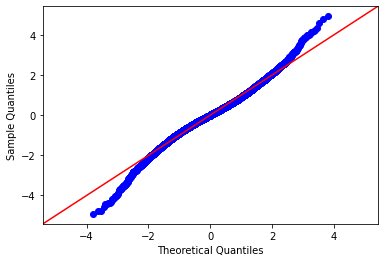

In [37]:
# validate the asssumption of normally distributed residuals
    # should show a straight line
    # a curve,distorted line suggests residuals have a non-normal distribution
import scipy.stats as stats
residuals = model_1_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# 13. Check Homoscedasticity

Heteroscedasticity (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases.

Looks like the data is heteroscedasticity.

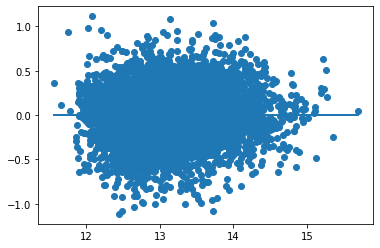

In [38]:
plt.scatter(model_1_results.predict(train_data[x_cols]), model_1_results.resid)
plt.plot(model_1_results.predict(train_data[x_cols]), [0 for i in range(len(train_data))])

# 14. Validate the Model

In [39]:
# outputs the training and testing data rows
print('Training Data')
print('-------------')
print(f'x_train: {len(x_train_data)}')
print(f'y_train: {len(y_train_data)}')
print('\n')
print('Testing Data')
print('-------------')
print(f'x_test: {len(x_test_data)}')
print(f'y_test: {len(y_test_data)}')

Training Data
-------------
x_train: 14315
y_train: 14315


Testing Data
-------------
x_test: 4772
y_test: 4772


**MAE** is the sum of absolute differences between our target and predicted variables. So it measures the average magnitude of errors in a set of predictions, without considering their directions.

**MSE** the average squared difference between the estimated values and the actual value.

**RMSE** Root Mean Square Error, is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train_data,y_train_data)

y_pred_train = lm.predict(x_train_data)
y_pred_test = lm.predict(x_test_data)

# calculate Mean absolute Error (MAE)
mae_train = mean_absolute_error(y_train_data, y_pred_train)
mae_test = mean_absolute_error(y_test_data, y_pred_test)
print("MAE Train Set:", mae_train) 
print("MAE Test Set :", mae_test,'\n')

# calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train_data, y_pred_train)
mse_test = mean_squared_error(y_test_data, y_pred_test)
print("MSE Train Set:", mse_train) 
print("MSE Test Set :", mse_test,'\n')

# calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE Train Set:", rmse_train)
print("RMSE Test Set:", rmse_test,'\n')

MAE Train Set: 0.17019122488602134
MAE Test Set : 0.16955506866904796 

MSE Train Set: 0.051162693325451716
MSE Test Set : 0.05056080527936871 

RMSE Train Set: 0.22619171807440633
RMSE Test Set: 0.2248572998133899 



In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(lm, x_train_data, y_train_data, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(lm, x_train_data, y_train_data, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(lm, x_train_data, y_train_data, cv=20, scoring='neg_mean_squared_error'))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.05180294688686077
-0.051720095955204284
-0.05170573098727756
